In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg

In [2]:
df = pd.read_csv('data/internet_service_churn.csv')  # Завантаження датасету
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


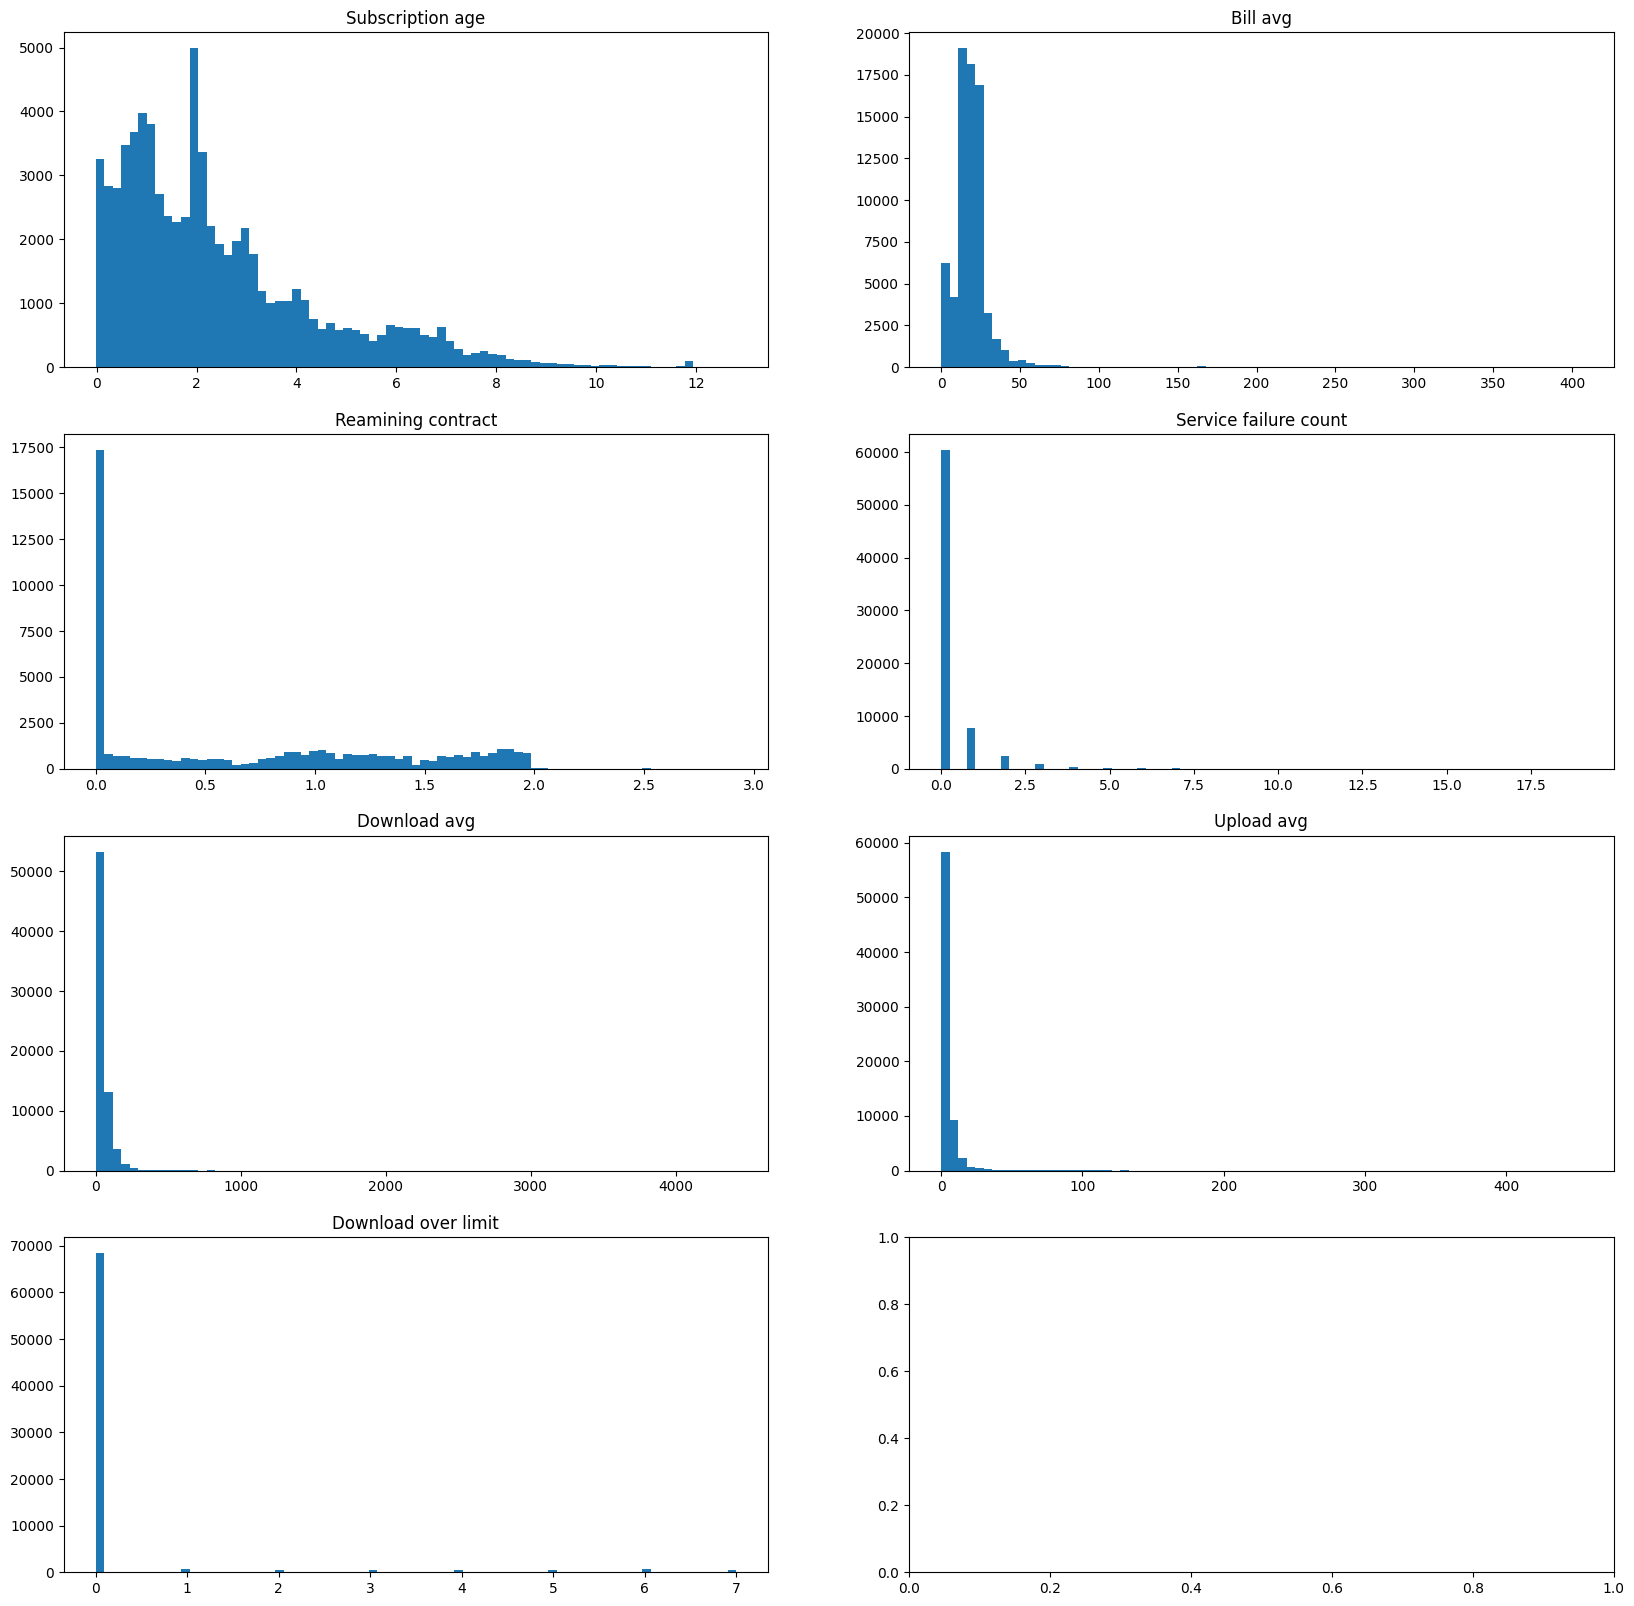

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (20, 20))    # Вивчення розподілів

ax[0,0].hist(df['subscription_age'], bins=75)
ax[0,0].set_title("Subscription age")

ax[0,1].hist(df['bill_avg'], bins=75)
ax[0,1].set_title("Bill avg")

ax[1,0].hist(df['reamining_contract'], bins=75)
ax[1,0].set_title("Reamining contract")

ax[1,1].hist(df['service_failure_count'], bins=75)
ax[1,1].set_title("Service failure count")

ax[2,0].hist(df['download_avg'], bins=75)
ax[2,0].set_title("Download avg")

ax[2,1].hist(df['upload_avg'], bins=75)
ax[2,1].set_title("Upload avg")

ax[3,0].hist(df['download_over_limit'], bins=75)
ax[3,0].set_title("Download over limit")

plt.show()

In [4]:
df.isna().sum() # Виявлення відсутніх значень

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [5]:
df.drop('id', axis=1).corr()    # Аналіз кореляцій

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
is_movie_package_subscriber,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
subscription_age,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
bill_avg,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
reamining_contract,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
service_failure_count,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
download_avg,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
download_over_limit,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318
churn,-0.327582,-0.307167,-0.122441,-0.021058,-0.625450,0.021575,-0.298063,-0.162690,0.158318,1.000000


# Q-Q графік

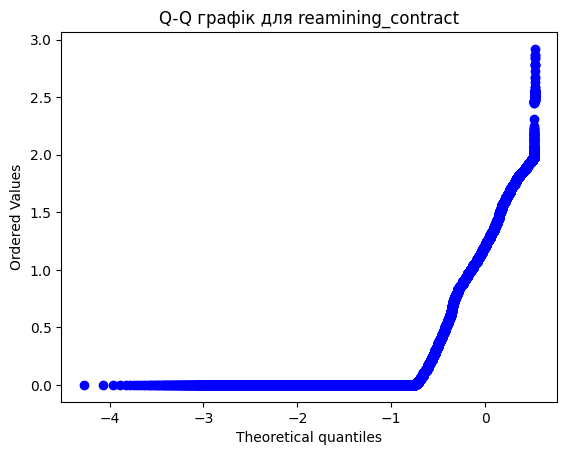

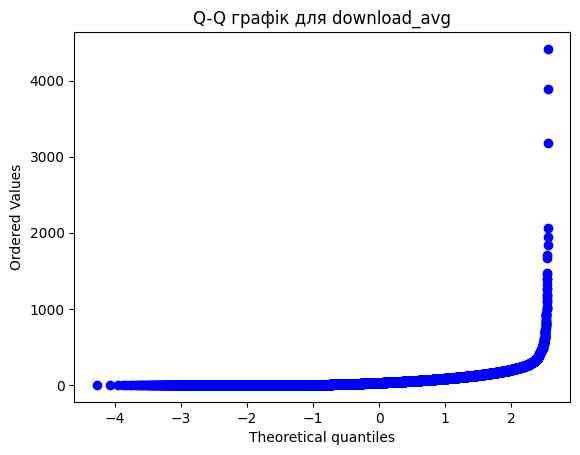

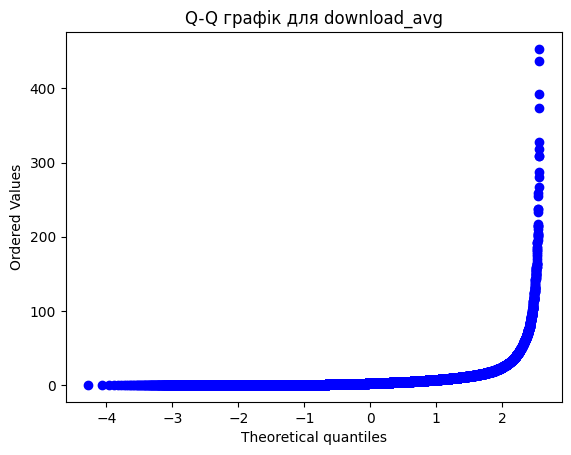

In [6]:
stats.probplot(df['reamining_contract'], dist="norm", plot=plt)
plt.title("Q-Q графік для reamining_contract")
plt.show()

stats.probplot(df['download_avg'], dist="norm", plot=plt)
plt.title("Q-Q графік для download_avg")
plt.show()

stats.probplot(df['upload_avg'], dist="norm", plot=plt)
plt.title("Q-Q графік для download_avg")
plt.show()

# Тест Шапіро-Вілка

In [7]:
result = pg.normality(df['reamining_contract'])
print(f'Для reamining_contract:\n{result}\n\n')

result = pg.normality(df['download_avg'])
print(f'Для download_avg:\n{result}\n\n')

result = pg.normality(df['upload_avg'])
print(f'Для upload_avg:\n{result}\n\n')

Для reamining_contract:
                           W           pval  normal
reamining_contract  0.856298  1.250498e-106   False


Для download_avg:
                     W           pval  normal
download_avg  0.557293  5.079389e-148   False


Для upload_avg:
                   W           pval  normal
upload_avg  0.323641  1.237723e-161   False




c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50702.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71893.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71893.
  res = hypotest_fun_out(*samples, **kwds)
